<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

In [2]:
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(10, 501, 1), 'tip')

togu = quality.automf(3)
rt = service.automf(3)

tip['low'] = fuzz.trimf(tip.universe, [10, 10, 250])
tip['medium'] = fuzz.trimf(tip.universe, [10, 250, 500])
tip['high'] = fuzz.trimf(tip.universe, [250, 500, 500])

/Users/rt/opt/anaconda3/lib/python3.7/site-packages/skfuzzy/control/term.py:74: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


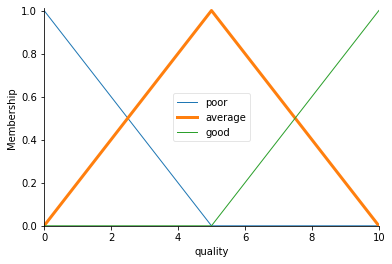

In [3]:
quality['average'].view()

/Users/rt/opt/anaconda3/lib/python3.7/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


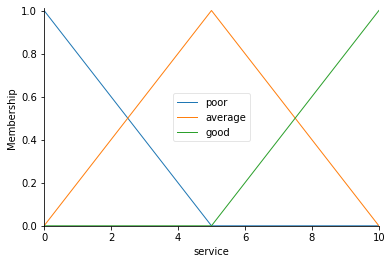

In [4]:
service.view()

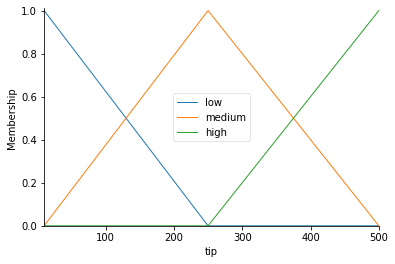

In [5]:
tip.view()

In [6]:
rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'])

rule2 = ctrl.Rule(service['poor']| quality['average'], tip['low'])

rule3 = ctrl.Rule(service['average']| quality['poor'], tip['medium'])

rule4 = ctrl.Rule(service['average']| quality['average'], tip['medium'])

rule5 = ctrl.Rule(service['good']| quality['average'], tip['high'])

rule6 = ctrl.Rule(service['good'] | quality['good'], tip['high'])

In [7]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])

In [8]:
sim = ctrl.ControlSystemSimulation(tipping_ctrl, flush_after_run = 50 * 50 + 1)

In [9]:
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

In [17]:
tipping.input['quality'] = 0
tipping.input['service'] = 0
tipping.compute()

Tip to be given :  213.0 rupees


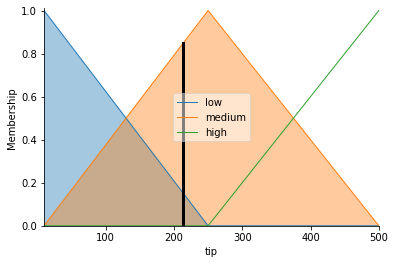

In [18]:
print('Tip to be given : ',round(tipping.output['tip']),'rupees')
tip.view(sim=tipping)

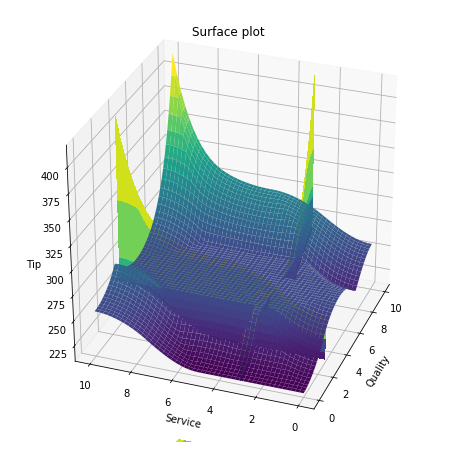

In [12]:
upsampled = np.linspace(0, 10, 50)
x, y = np.meshgrid(upsampled, upsampled)
z = np.zeros_like(x)

for i in range(50):
    for j in range(50):
        sim.input['quality'] = x[i, j]
        sim.input['service'] = y[i, j]
        sim.compute()
        z[i, j] = sim.output['tip']



fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis',
                       linewidth=0.4, antialiased=True)

cset = ax.contourf(x, y, z, zdir='z', offset=-2.5, cmap='viridis')
cset = ax.contourf(x, y, z, zdir='x', offset=3, cmap='viridis')
cset = ax.contourf(x, y, z, zdir='y', offset=3, cmap='viridis')
ax.set_xlabel('Quality')
ax.set_ylabel('Service')
ax.set_zlabel('Tip')
ax.set_title('Surface plot ')
ax.view_init(30, 200)